In [1]:
import pandas as pd
import jieba
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

pd.set_option('display.max_colwidth', None)#setting the maximize string show

fb = pd.read_csv('nysu_10902_2019立委_research.csv')
politics = pd.read_csv('9th_legislator_promise.csv')

In [2]:
kuan = fb[fb.page_name == "管碧玲 (kuanbiling)"]
# 把時間格式轉換
kuan['new_date'] = pd.to_datetime(kuan['created_time_taipei']).dt.date
kuan['post_hour'] = pd.to_datetime(kuan['created_time_taipei']).dt.hour #找出發文 '時間'(hour)
kuan['month_year'] = pd.to_datetime(kuan['new_date']).dt.to_period('M')

kuan.head(1)

<ipython-input-2-7c5bb8d47572>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kuan['new_date'] = pd.to_datetime(kuan['created_time_taipei']).dt.date
<ipython-input-2-7c5bb8d47572>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kuan['post_hour'] = pd.to_datetime(kuan['created_time_taipei']).dt.hour #找出發文 '時間'(hour)
<ipython-input-2-7c5bb8d47572>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,post_hour,month_year
10836,112542652141599_2285548514840991,112542652141599,管碧玲 (kuanbiling),政治人物,公務員感動的見證：我們家不搞特權！\n\n我擔任立委14年，老公「無薪階級」11年。他不搞官位、不搞獨董、也不當民間企業的顧問；甚至去找個相關的職業工會補四年的勞保年資，都不願為。\n「君子慎獨」！在沒有人看得到的地方，我們家都自持甚嚴。\n女婿追隨指導教授擔任機要在先，娶我女兒在後，不是因為我的特權，我特別再說明一次。\n9/18媒體炒作女婿特權時，有一個勞保局的官員，9/19就在他參加的群組公開作見證，公務員看多了，他從老公勞保年金怎麼領，清楚看到這是一個不搞特權的家庭！\n他說老公的勞保年金比家庭主婦還少，他感動的為我不搞特權作見證。\n說我搞特權，以訛傳訛持續不斷，今天媒體報導變本加厲，我只好再說明一次，也把老公請出場，對他實在不好意思！\n特別說明：老公是「無薪階級」可不是無業游民喔！他持續作義工，保護台灣文化古蹟，全國第一名（觀光客很喜歡的新北投露天溫泉，是他的傑作），他也是我成為「文資法之母」，最重要的幫手！\n我們家奉獻社會，不搞特權,NaN,photo,https://www.facebook.com/112542652141599/posts/2285548514840991/,2019-01-12T23:00:36+0000,2019-01-13T07:00:36,...,0,0,0,0,0,302,256,2019-01-13,7,2019-01


In [3]:
kuan = kuan.sort_values(by=['like_count'])
kuan

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,post_hour,month_year
11339,112542652141599_2941161235946379,112542652141599,管碧玲 (kuanbiling),政治人物,NaN,管碧玲 (kuanbiling) 更新了封面相片。,photo,https://www.facebook.com/112542652141599/posts/2941161235946379/,2020-01-06T07:18:54+0000,2020-01-06T15:18:54,...,0,0,0,0,0,1,0,2020-01-06,15,2020-01
11347,112542652141599_2932276656834837,112542652141599,管碧玲 (kuanbiling),政治人物,願罹難的英雄們安息！\n您們正要傳送長官對辛苦弟兄的愛與期許，\n路途中，\n幻化為天使，\n永遠守護他們！\n引領與守護，\n變成一種永恆！,管碧玲 (kuanbiling) 更新了封面相片。,photo,https://www.facebook.com/112542652141599/posts/2932276656834837/,2020-01-02T08:07:16+0000,2020-01-02T16:07:16,...,0,0,0,0,0,1,1,2020-01-02,16,2020-01
10889,112542652141599_245177136367215,112542652141599,管碧玲 (kuanbiling),政治人物,NaN,管碧玲 (kuanbiling) 加入了封面影片。,video,https://www.facebook.com/biling.kuan/videos/245177136367215/,2019-02-28T12:25:36+0000,2019-02-28T20:25:36,...,0,0,0,0,0,2,4,2019-02-28,20,2019-02
10966,112542652141599_2455195337876307,112542652141599,管碧玲 (kuanbiling),政治人物,母親節話家常，聊得很快樂\n\nhttps://www.facebook.com/1770605486509984/videos/441773279910666/,管碧玲 (kuanbiling),video,https://www.facebook.com/112542652141599/posts/2455195337876307/,2019-05-03T12:07:05+0000,2019-05-03T20:07:05,...,0,0,0,0,0,5,1,2019-05-03,20,2019-05
10869,112542652141599_2293359050726604,112542652141599,管碧玲 (kuanbiling),政治人物,「開放政府，行動內閣」，我們這樣做，人民會瞭解我們，支持我們！\nhttps://www.facebook.com/gogogoeball/videos/410991816307519/,管碧玲 (kuanbiling) 從「會做事 繼續衝」分享了 1 段影片。,video,https://www.facebook.com/112542652141599/posts/2293359050726604/,2019-01-18T01:44:32+0000,2019-01-18T09:44:32,...,0,0,0,0,0,5,1,2019-01-18,9,2019-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11239,112542652141599_2830495630346274,112542652141599,管碧玲 (kuanbiling),政治人物,難道侯友宜是韓國瑜的剋星？\n\n這是10/22眾多媒體的報導：\n\n「～～侯友宜表示，新北今年的目標已經達標，但達標不是一個目的，最近台商回來蠻多，新北已服務39家回流台商，預估投資金額超過3800億元，已落實超過1000億元，創造超過1萬8千個就業機會。～～～」,NaN,photo,https://www.facebook.com/112542652141599/posts/2830495630346274/,2019-11-19T09:35:56+0000,2019-11-19T17:35:56,...,0,0,0,0,0,275,800,2019-11-19,17,2019-11
11357,112542652141599_2925130817549421,112542652141599,管碧玲 (kuanbiling),政治人物,非常非常努力的捍衛「反滲透法」，好不容易討論完條文，多麼害怕明天的議程又會節外生枝！\n結果，因為時代力量要求變更議程，要把「礦業法」放進來，一時，出現議程因此被操作的危機，對於明天能不能順利進行表決大戰，出現危機。\n我和周春米委員，只好預防性的開始排隊！\n\n最後，因為協商結論反對黨都沒有簽字，我們為了以防萬一，只好在議場排隊備戰。\n\n再更新：我們最後願意相信院長協商時的裁示會被尊重，因此我們撤離議場的排隊！,NaN,photo,https://www.facebook.com/112542652141599/posts/2925130817549421/,2019-12-30T08:18:20+0000,2019-12-30T16:18:20,...,0,0,0,0,0,1356,875,2019-12-30,16,2019-12
11299,112542652141599_2905408216188348,112542652141599,管碧玲 (kuanbiling),政治人物,2:55分了，第九大隊才剛剛開始出發！\n第一大隊已經經過中央公園！\n光復高雄，氣勢驚人！\nWecare主辦單位粗估遊行人數已達30萬。,NaN,video,https://www.facebook.com/112542652141599/posts/2905408216188348/,2019-12-21T06:56:14+0000,2019-12-21T14:56:14,...,0,0,0,0,0,229,150,2019-12-21,14,2019-12
11245,112542652141599_2823264467736057,112542652141599,管碧玲 (kuanbiling),政治人物,人山人海，\n2.1萬人在線上，\n我們的熱情，\n預告光復高雄！,NaN,photo,https://www.facebook.com/112542652141599/posts/2823264467736057/,2019-11-16T10:13:21+0000,2019-11-16T18:13:21,...,0,0,0,0,0,288,134,2019-11-16,18,2019-11


In [4]:
kuan.reset_index(inplace=True)
kuan

,index,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,...,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,post_hour,month_year
0,11339,112542652141599_2941161235946379,112542652141599,管碧玲 (kuanbiling),政治人物,NaN,管碧玲 (kuanbiling) 更新了封面相片。,photo,https://www.facebook.com/112542652141599/posts/2941161235946379/,2020-01-06T07:18:54+0000,...,0,0,0,0,0,1,0,2020-01-06,15,2020-01
1,11347,112542652141599_2932276656834837,112542652141599,管碧玲 (kuanbiling),政治人物,願罹難的英雄們安息！\n您們正要傳送長官對辛苦弟兄的愛與期許，\n路途中，\n幻化為天使，\n永遠守護他們！\n引領與守護，\n變成一種永恆！,管碧玲 (kuanbiling) 更新了封面相片。,photo,https://www.facebook.com/112542652141599/posts/2932276656834837/,2020-01-02T08:07:16+0000,...,0,0,0,0,0,1,1,2020-01-02,16,2020-01
2,10889,112542652141599_245177136367215,112542652141599,管碧玲 (kuanbiling),政治人物,NaN,管碧玲 (kuanbiling) 加入了封面影片。,video,https://www.facebook.com/biling.kuan/videos/245177136367215/,2019-02-28T12:25:36+0000,...,0,0,0,0,0,2,4,2019-02-28,20,2019-02
3,10966,112542652141599_2455195337876307,112542652141599,管碧玲 (kuanbiling),政治人物,母親節話家常，聊得很快樂\n\nhttps://www.facebook.com/1770605486509984/videos/441773279910666/,管碧玲 (kuanbiling),video,https://www.facebook.com/112542652141599/posts/2455195337876307/,2019-05-03T12:07:05+0000,...,0,0,0,0,0,5,1,2019-05-03,20,2019-05
4,10869,112542652141599_2293359050726604,112542652141599,管碧玲 (kuanbiling),政治人物,「開放政府，行動內閣」，我們這樣做，人民會瞭解我們，支持我們！\nhttps://www.facebook.com/gogogoeball/videos/410991816307519/,管碧玲 (kuanbiling) 從「會做事 繼續衝」分享了 1 段影片。,video,https://www.facebook.com/112542652141599/posts/2293359050726604/,2019-01-18T01:44:32+0000,...,0,0,0,0,0,5,1,2019-01-18,9,2019-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523,11239,112542652141599_2830495630346274,112542652141599,管碧玲 (kuanbiling),政治人物,難道侯友宜是韓國瑜的剋星？\n\n這是10/22眾多媒體的報導：\n\n「～～侯友宜表示，新北今年的目標已經達標，但達標不是一個目的，最近台商回來蠻多，新北已服務39家回流台商，預估投資金額超過3800億元，已落實超過1000億元，創造超過1萬8千個就業機會。～～～」,NaN,photo,https://www.facebook.com/112542652141599/posts/2830495630346274/,2019-11-19T09:35:56+0000,...,0,0,0,0,0,275,800,2019-11-19,17,2019-11
524,11357,112542652141599_2925130817549421,112542652141599,管碧玲 (kuanbiling),政治人物,非常非常努力的捍衛「反滲透法」，好不容易討論完條文，多麼害怕明天的議程又會節外生枝！\n結果，因為時代力量要求變更議程，要把「礦業法」放進來，一時，出現議程因此被操作的危機，對於明天能不能順利進行表決大戰，出現危機。\n我和周春米委員，只好預防性的開始排隊！\n\n最後，因為協商結論反對黨都沒有簽字，我們為了以防萬一，只好在議場排隊備戰。\n\n再更新：我們最後願意相信院長協商時的裁示會被尊重，因此我們撤離議場的排隊！,NaN,photo,https://www.facebook.com/112542652141599/posts/2925130817549421/,2019-12-30T08:18:20+0000,...,0,0,0,0,0,1356,875,2019-12-30,16,2019-12
525,11299,112542652141599_2905408216188348,112542652141599,管碧玲 (kuanbiling),政治人物,2:55分了，第九大隊才剛剛開始出發！\n第一大隊已經經過中央公園！\n光復高雄，氣勢驚人！\nWecare主辦單位粗估遊行人數已達30萬。,NaN,video,https://www.facebook.com/112542652141599/posts/2905408216188348/,2019-12-21T06:56:14+0000,...,0,0,0,0,0,229,150,2019-12-21,14,2019-12
526,11245,112542652141599_2823264467736057,112542652141599,管碧玲 (kuanbiling),政治人物,人山人海，\n2.1萬人在線上，\n我們的熱情，\n預告光復高雄！,NaN,photo,https://www.facebook.com/112542652141599/posts/2823264467736057/,2019-11-16T10:13:21+0000,...,0,0,0,0,0,288,134,2019-11-16,18,2019-11


In [19]:
kuan = fb[fb.page_name == "管碧玲 (kuanbiling)"]
# 把時間格式轉換
kuan['new_date'] = pd.to_datetime(kuan['created_time_taipei']).dt.date
kuan['post_hour'] = pd.to_datetime(kuan['created_time_taipei']).dt.hour #找出發文 '時間'(hour)
kuan['month_year'] = pd.to_datetime(kuan['new_date']).dt.to_period('D')



juf=kuan[(kuan['month_year']>'2019-01-01')&(kuan['month_year']<'2019-06-30')]
juf




<ipython-input-19-99a422188119>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kuan['new_date'] = pd.to_datetime(kuan['created_time_taipei']).dt.date
<ipython-input-19-99a422188119>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kuan['post_hour'] = pd.to_datetime(kuan['created_time_taipei']).dt.hour #找出發文 '時間'(hour)
<ipython-input-19-99a422188119>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,post_hour,month_year
10836,112542652141599_2285548514840991,112542652141599,管碧玲 (kuanbiling),政治人物,公務員感動的見證：我們家不搞特權！\n\n我擔任立委14年，老公「無薪階級」11年。他不搞官位、不搞獨董、也不當民間企業的顧問；甚至去找個相關的職業工會補四年的勞保年資，都不願為。\n「君子慎獨」！在沒有人看得到的地方，我們家都自持甚嚴。\n女婿追隨指導教授擔任機要在先，娶我女兒在後，不是因為我的特權，我特別再說明一次。\n9/18媒體炒作女婿特權時，有一個勞保局的官員，9/19就在他參加的群組公開作見證，公務員看多了，他從老公勞保年金怎麼領，清楚看到這是一個不搞特權的家庭！\n他說老公的勞保年金比家庭主婦還少，他感動的為我不搞特權作見證。\n說我搞特權，以訛傳訛持續不斷，今天媒體報導變本加厲，我只好再說明一次，也把老公請出場，對他實在不好意思！\n特別說明：老公是「無薪階級」可不是無業游民喔！他持續作義工，保護台灣文化古蹟，全國第一名（觀光客很喜歡的新北投露天溫泉，是他的傑作），他也是我成為「文資法之母」，最重要的幫手！\n我們家奉獻社會，不搞特權,NaN,photo,https://www.facebook.com/112542652141599/posts/2285548514840991/,2019-01-12T23:00:36+0000,2019-01-13T07:00:36,...,0,0,0,0,0,302,256,2019-01-13,7,2019-01-13
10837,112542652141599_2283638668365309,112542652141599,管碧玲 (kuanbiling),政治人物,蘇院長這個真是厲害，真是好文！\n\nhttps://www.facebook.com/45289011269/posts/10156136024671270/,NaN,photo,https://www.facebook.com/112542652141599/posts/2283638668365309/,2019-01-11T15:48:04+0000,2019-01-11T23:48:04,...,0,0,0,0,0,35,3,2019-01-11,23,2019-01-11
10838,112542652141599_2283017088427467,112542652141599,管碧玲 (kuanbiling),政治人物,義、仁、勇，賴神！\n\n賴院長積極解決五缺，招商引資，佈局的架構，後續必定開花結果，分享全民，他此時該擔與不該擔，全部ㄧ肩扛起，有對民進黨的義，對長官同志的仁，與面對自我人生的勇！\n我兩度受他知遇邀請，奇妙的擦身而過，對他的珍惜看重，銘感於心，絲毫無損！\n我祝福賴院長：有朝一日，另有一個高峰，更高一重天，在那裏開展台灣的光明未來。,NaN,status,https://www.facebook.com/112542652141599/posts/2283017088427467/,2019-01-11T05:40:07+0000,2019-01-11T13:40:07,...,0,0,0,0,0,6,3,2019-01-11,13,2019-01-11
10839,112542652141599_2282882558440920,112542652141599,管碧玲 (kuanbiling),政治人物,只許成功不許失敗,NaN,photo,https://www.facebook.com/112542652141599/posts/2282882558440920/,2019-01-11T03:09:39+0000,2019-01-11T11:09:39,...,0,0,0,0,0,3,0,2019-01-11,11,2019-01-11
10840,112542652141599_2281527365243106,112542652141599,管碧玲 (kuanbiling),政治人物,如果這次金馬獎舞台上，「各表」之後，中國代表團沒有抵制杯葛，那國民黨版的「九二共識」就真的存在了！\n問題是，就是不允許啊，下了台，整個就杯葛抵制，回去後還必須交心撇清，這還叫做「一中各表」嗎？\n金馬獎試過了，「一中各表」不存在啊！,NaN,status,https://www.facebook.com/112542652141599/posts/2281527365243106/,2019-01-10T03:51:59+0000,2019-01-10T11:51:59,...,0,0,0,0,0,1,4,2019-01-10,11,2019-01-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11013,112542652141599_2532291676833339,112542652141599,管碧玲 (kuanbiling),政治人物,台灣人民聲援香港的民意，終於經由我們的國會，用跨黨派的共同決議表達出去了！\n\n一、香港政府以武力處理群眾運動的方式，本院全體同仁提出譴責與抗議：香港人民發動大規模的人民抗議活動，表達人民聲音，本院各黨團不認同香港政府以武力方式對待群眾運動，呼籲香港政府應謙卑面對群眾訴求，將衝突降到最低。\n二、我們聲援香港人民民主自由的訴求，呼籲香港政府應撤回逃犯條例草案：基於捍衛自由民主人權的普世基本價值，合作打擊犯罪不能以侵害人權的法案為前提。香港人民有權追求自己的民主與自由，我們永遠支持這種普世價值，反對侵害人權自由。\n三、建議政府應對香港人民以行動支持並提供關懷及援助：香港人民行動演變為流血衝突，為支持香港的民主法治體制與自由民主，建議政府應依「香港澳門關係條例」第18條及相關規定，對於因政治因素而致安全及自由受有緊急危害的香港居民，得提供必要的援助，並給予關懷。,NaN,photo,https://www.facebook.com/112542652141599/posts/2532291676833339/,2019-06-17T13:13:19+0000,2019-06-17T21:13:19,...,0,0,0,0,0,14,19,2019-06-17,21,2019-06-17
11014,112542652141599_2531735896888917,112542652141599,管碧玲 (kuanbiling),政治人物,救命啊，到底要怎麼應付這種人啊？！\n不通知，突然帶著媒體殺進去我的研究室，我正在參加朝野協商，爭取立法院可以通過決議文，聲援香港。\n然後，辦公室主任告訴我，他們以禮相待啊！然後，說謊操作成這樣：,NaN,photo,https://www.facebook.com/112542652141599/posts/2531735896888917/,2019-06-17T06:42:27+0000,2019-06-17T14:42:27,...,0,0,0,0,0,266,234,2019-06-17,14,2019-06-17
11015,112542652141599_2531404390255401,112542652141599,管碧玲 (kuanbiling),政治人物,國民黨藉事藉端，嚴辭拒絕以立法院決議文方式，聲援香港反送中運動！\n怎麼勸就是不肯。\n太遺憾了！\n國際人權的關懷是跨黨派的議題，國民黨用黨爭的政治操作來反對，讓廣大人民對香港的關心，無法藉由國會來表達。\n時代力量和民進黨都表示文字可以討論，院長也ㄧ再表達會避免各政黨無法接受的文字，還是不肯！,NaN,photo,https://www.facebook.com/112542652141599/posts/2531404390255401/,2019-06-17T01:45:51+0000,2019-06-17T09:45:51,...,0,0,0,0,0,52,70,2019-06-17,9,2019-06-17
11016,112542652141599_2530242617038245,112542652141599,管碧玲 (kuanbiling),政治人物,我們看到勇氣，香港加油！\nhttps://www.facebook.com/RTHKVNEWS/videos/463724431057974/,管碧玲 (kuanbiling),video,https://www.facebook.com/112542652141599/posts/2530242617038245/,2019-06-16T11:05:29+0000,2019-06-16T19:05:29,...,0,0,0,0,0,7,28,2019-06-1

結巴斷詞 jieba

len(liu): 看劉櫂豪的貼文總共有幾筆
list(liu['message']): 把要斷詞的內容轉成 list 格式
創造一個新的dataframe叫做liu_docs，型態是pandas.core.frame.DataFrame
原本liu_docs裡面的'jieba_results'欄位型態是pandas.core.series.Series，需要轉成'str'(字串)型態才能做後續處理。

In [20]:

doc_juf = range(len(juf)) #管碧玲有幾篇文章
doc_juf

range(0, 181)

In [27]:
import numpy as np
juf = juf.replace(np.nan, '', regex=True) #將nan取代成空白字串

text_list = list(kuan['message'])
juf_docs = pd.DataFrame(columns=['jieba_results'])
juf_docs['jieba_results'] = juf_docs['jieba_results'].astype('str')

In [28]:
import jieba
from tqdm import tqdm
import re
jieba.load_userdict("dict.txt")


punctuation = "、，：:""()\n!！？｡＂＃＄％＆＇（）＊＋－／：；＜＝＞＠［＼］＾＿｀｛｜｝～｟｠｢｣､、〃》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—‘'‛“”„‟…‧﹏"""
re_punctuation = "[{}] ".format(punctuation)

for i in doc_juf: #從第一篇到六月底
    words = jieba.cut(text_list[i], cut_all = False)
    text = ''
    for word in words:
        text = text + ' ' + str(word) 
    #print(words)
    #print(i) #第幾篇文章
    #print(text) #第幾篇文章的斷詞結果
    text = re.sub(re_punctuation, "", text)
    text = re.sub(r'[0-9]','',text)
    text = re.sub(r'[a-zA-Z]','',text)
    s = pd.Series({'jieba_results': text})
    juf_docs = juf_docs.append(s, ignore_index=True) #每次的斷詞結果都加回kuan_docs

AttributeError: 'float' object has no attribute 'decode'

In [29]:
juf_docs

,jieba_results
0,公務員 感動 的 見證 我們 家 不 搞 特權 我 擔任 立委 年 老公 無薪 階級 年 。 他 不 搞 官位 不 搞 獨董 也 不 當民間 企業 的 顧問 甚至 去 找個 相關 的 職業工會 補 四年 的 勞保年資 都 不願 為 。 君子 慎獨 在 沒 有人 看 得到 的 地方 我們 家 都 自持 甚嚴 。 女婿 追隨 指導教授 擔任 機要 在 先 娶 我 女兒 在 後 不是 因為 我 的 特權 我 特別 再 說明 一次 。 / 媒體 炒作 女婿 特權 時 有 一個 勞保局 的 官員 / 就 在 他 參加 的 群 組公開 作見證 公務員 看 多 了 他 從 老公 勞保年金 怎麼領 清楚 看到 這是 一個 不 搞 特權 的 家庭 他 說 老公 的 勞保年金 比 家庭 主婦 還少 他 感動 的 為 我 不 搞 特權 作見證 。 說 我 搞 特權 以訛傳訛 持續 不斷 今天 媒體 報導 變本 加厲 我 只好 再 說明 一次 也 把 老公 請 出場 對 他 實在 不好意思 特別 說明 老公 是 無薪 階級 可不是 無業 游民 喔 他 持續 作 義工 保護 台灣 文化 古蹟 全國 第一名 觀光客 很 喜歡 的 新北投 露天 溫泉 是 他 的 傑作 他 也 是 我 成為 文資法 之母 最 重要 的 幫手 我們 家 奉獻 社會 不 搞 特權
1,蘇院長 這個 真是 厲害 真是 好文 / / . . / / / /
2,義 仁 勇 賴神 賴院 長 積極解 決五缺 招商 引資 佈 局 的 架構 後 續 必定 開花 結果 分享 全民 他 此時 該擔 與 不 該擔 全部 ㄧ 肩 扛起 有 對民進 黨 的 義 對 長官 同志 的 仁 與面 對 自我 人生 的 勇 我 兩度 受 他 知遇 邀請 奇妙 的 擦身 而過 對 他 的 珍惜 看重 銘感 於 心 絲毫 無損 我 祝福 賴院 長 有朝一日 另有 一個 高峰 更 高一 重天 在 那 裏 開展 台灣 的 光明 未來 。
3,只許 成功 不許 失敗
4,如果 這次 金馬獎 舞台 上 各表 之 後 中國 代表 團沒有 抵制 杯葛 那國民黨 版 的 九二 共識 就 真的 存在 了 問題 是 就是 不允許 啊 下 了 台 整個 就 杯葛 抵制 回去 後 還必須 交心 撇清 這還 叫做 一中 各表 嗎 金馬獎 試過 了 一中 各表 不 存在 啊 ！
5,我 陪 過志偉 掃街 拜票 他 熱情 謙卑 柔軟 又 親切 的 態度 渾然 天成 的 就是 一個 優秀 民意代表 的 條件 發自內心 深處 的 熱愛基層 會 很 明顯 的 顯露 在 一個 人 的 態度 志偉 是 非常 熱愛基層 的 典型 長期 看 他 的 問政 我 支持 他 在 此 拜 託 大家 惠賜 神聖 的 一票 ！
6,有人 說 歲 計 賸 餘 不要 發紅利 要 減稅 其實 已經 做 了 這 二年 因為 經濟表現 不錯 蔡英文 政府 已經往 輕稅 簡政 走 去年 就 修改 稅法 大幅 減輕受 薪階級 的 稅賦 負擔 如 附圖 檔 受惠 的 超過 五百 萬戶 單身 年薪 . 萬內 免繳 所得 稅 年省 元 。 雙薪 家庭 年薪 . 萬內 免繳 所得 稅 年省 元 。 雙薪 三口 之 家 年薪 . 萬免繳 所得 稅 年省 元 。 雙薪 四口 之 家 年薪 . 萬免繳 所得 稅 年省 元 。 可以 減輕 的 負擔 是 每年 都減 喔 有人 說 憑什麼 拿 我繳 的 所得 稅去 幫助 低 所得 的 人 其實 這有 二個 錯誤 認知 第一 個 是 這次 談到 的 歲 計 賸 餘 或是 經濟 上 揚紅利 的 億 主要 是 來 自營 所稅 贈與稅 地價稅 不是 個 人 的 所得 稅 而且 所得 稅的 減稅 已 經先 做 了 。 第二 是 政府 平常 的 社會 福利 或 任何 公共 支出 本來 每 一筆 都 一定 是 來 自稅 收 或 公共 營收 政府 公權力 的 分配 才能 讓 社會 健全 發展 小英總統 照顧 年輕人 在 招商 來 的 產業 投資 還沒有 爆發 經濟 紅利 的 時候 先用 減輕 年輕人 負擔 的 方向 來 制定 政策 她 是 非常 照顧 年輕人 的 總統
7,郵件 處理 中心 的 事 經過 督促 很快 有 改善 。 承攬商 迅速 回應 給予 派遣 工 每天晚上 出勤 即以 四小時 計算 。 政府 及其 所屬 機關 構 的 非典型 就業 何其 多 我將 陸續 盤點 。 公部門 消除 非典型 就業 改善 勞動 條件 這是 一個 需要 很大 的 決心 來 做 的 事 。
8,沒 有人 需要 公開 對 我 說 一句 什麼 話 確定 失去 戰場 第一天 清晨 心 酸酸的 還是 要 振作 所以 請 和 我 一起 關心 人心惶惶 的 派遣 工吧 * 請 看 我 的 前 一篇
9,"國營事業 連 派遣 工都 要 剝削 基 於 對 勞工 權益 的 關心 我 偶爾會 抽查 一些 公務 機關 或 國營事業 的 勞務承攬 標案 這次 我查 到 中華郵政 的 一個 平常 郵件 分揀封 發業務 的 案子 標 的 是 採購 小時 勞務 由 於 採用 價格標 所以 決標 金額 為 , , 元 換算後為 每小時 元 不但 高 於 今年 元旦 實施 的 時 薪制 基本 工資 元 這樣 的 數額 甚至 可說 讓 承攬業者 有 提取 相當 寬裕營 運費用 與 獲取 合理 利潤 的 空間 但 令人 憤怒 的 是 根據 我 調查 結果 從 今年 月 日起 中華 郵政竟 與 承攬業者 合意 苛扣 派遣 工 把 採購案 原來 應該 是 時薪 元 每小時 完成 公斤 的 時 薪制 勞動 條件 改為 每小時 完成 . 公斤 的 論件 計酬 的 方式 且 派遣 工個 人 工作 時數 竟然 沒有 核實 計算 而是 以當 日 總工時 除以 當日 全部 出勤 派遣 工人 數來 平均 計算 核給 如果 一個 實際 上班 小時 的 派遣 工 卻 因 論件 計酬 門檻 + 平均 計算 工時 的 契約 條件 計算 結果 而僅 核給 小時 工資 等 於 實際 時薪 是 × / = 元 這樣 的 時薪 不僅 倒退 回 年 的 水準 而且 是 低 於 基本 工資 的 嚴重 違法 狀態 再者 以 郵件 分 揀 封發 這樣 高勞力 低技術 的 工作 三成 營運 成本 已 是 高估 本案 中華 郵政給 元 / 時 的 採購 金額 實際到 派遣 工 手上 的 元 / 時 等 於 有 元 的 毛利 扣除 營運 成本 承攬 本案 幾乎 有 高達 多萬元 的 獲利 我 沉重 的問 國營事業 可以 如此 帶頭 違法 嗎 國營事業 豈 可是 製 造 低薪 的 幫 兇 嗎 國營事業 可以 剝削 最弱勢 勞工 的 薪資 嗎 因此 我 要求 本案 勞動 契約 應以 每日 小時 工時 核薪 不得 設論件 計酬 條款 導致 因郵件 量 少 而 短計 工時 不得 以無郵件 為 理由 強制 排班 休假 不得 以 平均 工時 之 變相 減薪 方式 給薪 最 後 也 是 重要 的 是 國營事業 勞務外 包案 應 全面 體檢其 必要性 和 勞動 條件 ！"


In [31]:
juf['jieba_results'] = juf_docs
juf_post = juf[['new_date','message','jieba_results','like_count']]
juf_post


,new_date,message,jieba_results,like_count
10836,2019-01-13,公務員感動的見證：我們家不搞特權！\n\n我擔任立委14年，老公「無薪階級」11年。他不搞官位、不搞獨董、也不當民間企業的顧問；甚至去找個相關的職業工會補四年的勞保年資，都不願為。\n「君子慎獨」！在沒有人看得到的地方，我們家都自持甚嚴。\n女婿追隨指導教授擔任機要在先，娶我女兒在後，不是因為我的特權，我特別再說明一次。\n9/18媒體炒作女婿特權時，有一個勞保局的官員，9/19就在他參加的群組公開作見證，公務員看多了，他從老公勞保年金怎麼領，清楚看到這是一個不搞特權的家庭！\n他說老公的勞保年金比家庭主婦還少，他感動的為我不搞特權作見證。\n說我搞特權，以訛傳訛持續不斷，今天媒體報導變本加厲，我只好再說明一次，也把老公請出場，對他實在不好意思！\n特別說明：老公是「無薪階級」可不是無業游民喔！他持續作義工，保護台灣文化古蹟，全國第一名（觀光客很喜歡的新北投露天溫泉，是他的傑作），他也是我成為「文資法之母」，最重要的幫手！\n我們家奉獻社會，不搞特權,NaN,11051
10837,2019-01-11,蘇院長這個真是厲害，真是好文！\n\nhttps://www.facebook.com/45289011269/posts/10156136024671270/,NaN,279
10838,2019-01-11,義、仁、勇，賴神！\n\n賴院長積極解決五缺，招商引資，佈局的架構，後續必定開花結果，分享全民，他此時該擔與不該擔，全部ㄧ肩扛起，有對民進黨的義，對長官同志的仁，與面對自我人生的勇！\n我兩度受他知遇邀請，奇妙的擦身而過，對他的珍惜看重，銘感於心，絲毫無損！\n我祝福賴院長：有朝一日，另有一個高峰，更高一重天，在那裏開展台灣的光明未來。,NaN,225
10839,2019-01-11,只許成功不許失敗,NaN,119
10840,2019-01-10,如果這次金馬獎舞台上，「各表」之後，中國代表團沒有抵制杯葛，那國民黨版的「九二共識」就真的存在了！\n問題是，就是不允許啊，下了台，整個就杯葛抵制，回去後還必須交心撇清，這還叫做「一中各表」嗎？\n金馬獎試過了，「一中各表」不存在啊！,NaN,128
...,...,...,...,...
11013,2019-06-17,台灣人民聲援香港的民意，終於經由我們的國會，用跨黨派的共同決議表達出去了！\n\n一、香港政府以武力處理群眾運動的方式，本院全體同仁提出譴責與抗議：香港人民發動大規模的人民抗議活動，表達人民聲音，本院各黨團不認同香港政府以武力方式對待群眾運動，呼籲香港政府應謙卑面對群眾訴求，將衝突降到最低。\n二、我們聲援香港人民民主自由的訴求，呼籲香港政府應撤回逃犯條例草案：基於捍衛自由民主人權的普世基本價值，合作打擊犯罪不能以侵害人權的法案為前提。香港人民有權追求自己的民主與自由，我們永遠支持這種普世價值，反對侵害人權自由。\n三、建議政府應對香港人民以行動支持並提供關懷及援助：香港人民行動演變為流血衝突，為支持香港的民主法治體制與自由民主，建議政府應依「香港澳門關係條例」第18條及相關規定，對於因政治因素而致安全及自由受有緊急危害的香港居民，得提供必要的援助，並給予關懷。,NaN,624
11014,2019-06-17,救命啊，到底要怎麼應付這種人啊？！\n不通知，突然帶著媒體殺進去我的研究室，我正在參加朝野協商，爭取立法院可以通過決議文，聲援香港。\n然後，辦公室主任告訴我，他們以禮相待啊！然後，說謊操作成這樣：,NaN,1273
11015,2019-06-17,國民黨藉事藉端，嚴辭拒絕以立法院決議文方式，聲援香港反送中運動！\n怎麼勸就是不肯。\n太遺憾了！\n國際人權的關懷是跨黨派的議題，國民黨用黨爭的政治操作來反對，讓廣大人民對香港的關心，無法藉由國會來表達。\n時代力量和民進黨都表示文字可以討論，院長也ㄧ再表達會避免各政黨無法接受的文字，還是不肯！,NaN,819
11016,2019-06-16,我們看到勇氣，香港加油！\nhttps://www.facebook.com/RTHKVNEWS/videos/463724431057974/,NaN,848


In [32]:
import matplotlib.pyplot as plt

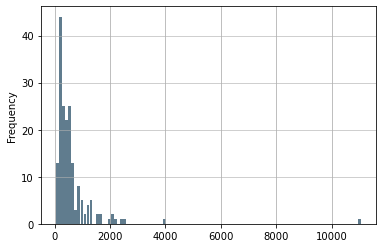

In [33]:
commutes = juf_post['like_count']
commutes.plot.hist(grid=True, bins=100, rwidth=0.9,
color='#607c8e')
plt.grid(axis='y', alpha=0.75)

In [35]:
corpus = juf['jieba_results'].values.tolist()

???????????????????????????????????????????????????????

In [39]:
# TF-IDF
# coding:utf-8  

#算字頻
from sklearn.feature_extraction.text import CountVectorizer  
vectorizer = CountVectorizer()  
X = vectorizer.fit_transform(corpus)  
word = vectorizer.get_feature_names()  

#計算TFIDF
from sklearn.feature_extraction.text import TfidfTransformer  
transformer = TfidfTransformer()  
tfidf = transformer.fit_transform(X)

ValueError: np.nan is an invalid document, expected byte or unicode string.

In [38]:
from sklearn.decomposition import LatentDirichletAllocation
LDA = LatentDirichletAllocation(n_components=8, random_state=None)
LDA.fit(tfidf)

#觀看結果
for i,topic in enumerate(LDA.components_):
    print(f"TOP 10 WORDS PER TOPIC #{i}")
    print([vectorizer.get_feature_names()[index] for index in topic.argsort()[-10:]])

NameError: name 'tfidf' is not defined

In [46]:
words = jieba.lcut(text_list[1], cut_all = False)
print(words)

['蘇院長', '這個', '真是', '厲害', '，', '真是', '好文', '！', '\n', '\n', 'https', ':', '/', '/', 'www', '.', 'facebook', '.', 'com', '/', '45289011269', '/', 'posts', '/', '10156136024671270', '/']


In [47]:
words = jieba.lcut(text_list[234], cut_all = False)
print(words)

['我', '完全', '沒有', '買免', '稅品', '，', '這有', '什麼', '好', '標榜', '的', '？', '偏偏', '被華', '航劉', '某某', '胡扯', '，', '讓', '我', '氣到', '冒', '煙', '！', '\n', '\n', '本來', '不想', '自我', '標榜', '，', '被華航', '人士', 'ㄧ', '胡扯', '，', '支持者', '紛紛', '來', '關切', '，', '叫', '我', '要', '自清', '，', '只好', '請出', '雞排', '！', '\n', '\n', '華航', '這次', '把', '免稅', '商品', '書', '一一', '送到', '辦', '公室', '，', '把', '陋習', '送到', '面前', '讓', '團員', '捲', '入', '，', '這種', '作為', '不', '知道', '要', '發自內心', '徹底', '檢討', '，', '還', '嬉皮', '笑', '臉', '的', '當作', '旁', '觀者', '一樣', '，', '嬉笑', '怒', '罵', '胡扯', '一通', '，', '這是', '什麼', '文化', '？', '\n', '\n', '根據', '聯合報', '報導', '，', '今天', '華航', '「', '派', '」', '三', '管理', '階層', '代表', '上廣播', '節目', '，', '談', '「', '你', '所', '不', '知道', '的', '總統', '專機', '」', '。', '\n', '\n', '這', '三名', '華航', '「', '派', '」', '的', '管理', '階層', '三位', '代表', '是', ':', '公共', '關', '係', '室', '協理', '林恒杉', '、', '空服', '處空服', '管理部', '經理劉', '建文', '、', '空服', '處', '客艙', '經理', '駱婷', '。', '\n', '\n', '節目', '中', '主持人', '問', '，', '這次', '機上', '買免', '稅品', '是否', '有', '

In [30]:
kuan = fb[fb.page_name == "管碧玲 (kuanbiling)"]
# 把時間格式轉換
kuan['new_date'] = pd.to_datetime(kuan['created_time_taipei']).dt.date
kuan['post_hour'] = pd.to_datetime(kuan['created_time_taipei']).dt.hour #找出發文 '時間'(hour)
kuan['month_year'] = pd.to_datetime(kuan['new_date']).dt.to_period('D')



juf=kuan[(kuan['month_year']>'2019-01-01')&(kuan['month_year']<'2019-07-31')]
juf




<ipython-input-30-5a2a2460f2d5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kuan['new_date'] = pd.to_datetime(kuan['created_time_taipei']).dt.date
<ipython-input-30-5a2a2460f2d5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kuan['post_hour'] = pd.to_datetime(kuan['created_time_taipei']).dt.hour #找出發文 '時間'(hour)
<ipython-input-30-5a2a2460f2d5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,post_hour,month_year
10836,112542652141599_2285548514840991,112542652141599,管碧玲 (kuanbiling),政治人物,公務員感動的見證：我們家不搞特權！\n\n我擔任立委14年，老公「無薪階級」11年。他不搞官位、不搞獨董、也不當民間企業的顧問；甚至去找個相關的職業工會補四年的勞保年資，都不願為。\n「君子慎獨」！在沒有人看得到的地方，我們家都自持甚嚴。\n女婿追隨指導教授擔任機要在先，娶我女兒在後，不是因為我的特權，我特別再說明一次。\n9/18媒體炒作女婿特權時，有一個勞保局的官員，9/19就在他參加的群組公開作見證，公務員看多了，他從老公勞保年金怎麼領，清楚看到這是一個不搞特權的家庭！\n他說老公的勞保年金比家庭主婦還少，他感動的為我不搞特權作見證。\n說我搞特權，以訛傳訛持續不斷，今天媒體報導變本加厲，我只好再說明一次，也把老公請出場，對他實在不好意思！\n特別說明：老公是「無薪階級」可不是無業游民喔！他持續作義工，保護台灣文化古蹟，全國第一名（觀光客很喜歡的新北投露天溫泉，是他的傑作），他也是我成為「文資法之母」，最重要的幫手！\n我們家奉獻社會，不搞特權,NaN,photo,https://www.facebook.com/112542652141599/posts/2285548514840991/,2019-01-12T23:00:36+0000,2019-01-13T07:00:36,...,0,0,0,0,0,302,256,2019-01-13,7,2019-01-13
10837,112542652141599_2283638668365309,112542652141599,管碧玲 (kuanbiling),政治人物,蘇院長這個真是厲害，真是好文！\n\nhttps://www.facebook.com/45289011269/posts/10156136024671270/,NaN,photo,https://www.facebook.com/112542652141599/posts/2283638668365309/,2019-01-11T15:48:04+0000,2019-01-11T23:48:04,...,0,0,0,0,0,35,3,2019-01-11,23,2019-01-11
10838,112542652141599_2283017088427467,112542652141599,管碧玲 (kuanbiling),政治人物,義、仁、勇，賴神！\n\n賴院長積極解決五缺，招商引資，佈局的架構，後續必定開花結果，分享全民，他此時該擔與不該擔，全部ㄧ肩扛起，有對民進黨的義，對長官同志的仁，與面對自我人生的勇！\n我兩度受他知遇邀請，奇妙的擦身而過，對他的珍惜看重，銘感於心，絲毫無損！\n我祝福賴院長：有朝一日，另有一個高峰，更高一重天，在那裏開展台灣的光明未來。,NaN,status,https://www.facebook.com/112542652141599/posts/2283017088427467/,2019-01-11T05:40:07+0000,2019-01-11T13:40:07,...,0,0,0,0,0,6,3,2019-01-11,13,2019-01-11
10839,112542652141599_2282882558440920,112542652141599,管碧玲 (kuanbiling),政治人物,只許成功不許失敗,NaN,photo,https://www.facebook.com/112542652141599/posts/2282882558440920/,2019-01-11T03:09:39+0000,2019-01-11T11:09:39,...,0,0,0,0,0,3,0,2019-01-11,11,2019-01-11
10840,112542652141599_2281527365243106,112542652141599,管碧玲 (kuanbiling),政治人物,如果這次金馬獎舞台上，「各表」之後，中國代表團沒有抵制杯葛，那國民黨版的「九二共識」就真的存在了！\n問題是，就是不允許啊，下了台，整個就杯葛抵制，回去後還必須交心撇清，這還叫做「一中各表」嗎？\n金馬獎試過了，「一中各表」不存在啊！,NaN,status,https://www.facebook.com/112542652141599/posts/2281527365243106/,2019-01-10T03:51:59+0000,2019-01-10T11:51:59,...,0,0,0,0,0,1,4,2019-01-10,11,2019-01-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11067,112542652141599_2582838608445312,112542652141599,管碧玲 (kuanbiling),政治人物,自由民主永續之旅-蔡總統-邦誼與外交的實踐\n\n聖克里斯多福及尼維斯 是由兩座島嶼組成的國家，蔡英文總統去了尼維斯島，下午則回到聖啟茨島和哈里斯總理（Dr. The Honourable Timothy Harris）會晤，並簽署了「技職教育暨職業訓練合作協定」。\n \n蔡總統說:她常常說，台灣的合作計畫不是成衣廠，而是量身定做的裁縫。我們很樂意分享台灣在技職教育領域的經驗，協助克國培養更多技術專業人才，一起來把聖克里斯多福及尼維斯打造成加勒比海地區最安全、最舒適的觀光天堂。,NaN,photo,https://www.facebook.com/112542652141599/posts/2582838608445312/,2019-07-16T03:35:41+0000,2019-07-16T11:35:41,...,0,0,0,0,0,4,14,2019-07-16,11,2019-07-16
11068,112542652141599_2581981018531071,112542652141599,管碧玲 (kuanbiling),政治人物,訪問團交流剪影。聖克里斯多福及尼維斯有五個國父（Founding Fathers)，第三張合照中較年長的先生即聖國唯一在世的一位國父，他們尊稱他是「國家英雄」（national hero)。他就是獨立後第一任總理甘迺迪·西蒙茲Kennedy Simmonds。\n\n西蒙茲男爵建國後，第一個建交的國家就是台灣（中華民國）。因為我們的農耕隊在克國建國前，就和他們建立了感情。他到今天還非常感謝台灣在農業上對他們的貢獻。\n\n至今，他的黨是國會最大的政黨，每在黨內有聲音要和中國建交，他會替台灣講話。\n\n與我交談的女士是甘迺迪·西蒙茲的夫人，算是聖國的國母。她說：「妳們國家，幫助我們很多，尤其是在農業技術上面，我們很謝謝妳們。」\n\n第一張合照中，為克里斯多福及尼維斯現任總理哈里斯（Timothy Harris）閣下。總理的政黨在國會只有一席，但是因為選舉前執政聯盟的三個政黨說好由他擔任總理，選完，人民行動黨成為最大黨，依然信守承諾，只擔任副總理，仍然支持哈里斯出任總理。,NaN,photo,https://www.facebook.com/112542652141599/posts/2581981018531071/,2019-07-15T15:55:23+0000,2019-07-15T23:55:23,...,0,0,0,0,0,9,7,2019-07-15,23,2019-07-15
11069,112542652141599_2580855765310263,112542652141599,管碧玲 (kuanbiling),政治人物,今天隨總統訪問聖克里斯多福及尼維斯。\n\n今天訪問了一個很特殊的地方漢密爾頓故居（Hamilton House)。亞歷山大·漢密爾頓（Alexander Hamilton，1757年1月11日－1804年7月12日）出生於此（第四張照片是出生的房子，第六張照片是他生活到8歲的房子）當年是英屬西印度群島尼維斯。這也是台灣總統第一次造訪尼維斯這個島嶼。\n\n漢密爾頓的父親，在漢密爾頓小時即離家而去，母親算是早逝，而成為一個孤兒。年紀很小就被一位富商Nicolas Cruger收留擔任會計員，且因聰明才智被賞識，而被送到當年同為英屬的新英格蘭，在紐約受教育，約16歲入讀今哥倫比亞大學的前身國王學院，但未畢業即投身軍旅，參加美國獨立戰爭，成為華盛頓的助理。\n\n漢密爾頓是律師、經濟學家、政治哲學家。他繼華盛頓之後擔任美國軍隊總指揮。他是美國憲法起草人之一，也是美國海岸警衛隊、紐約郵報的創辦人，也是美國的第一任財政部長（1789年9月11日-1795年1

In [51]:
words = jieba.lcut(text_list[1], cut_all = False)
print(words)

['蘇院長', '這個', '真是', '厲害', '，', '真是', '好文', '！', '\n', '\n', 'https', ':', '/', '/', 'www', '.', 'facebook', '.', 'com', '/', '45289011269', '/', 'posts', '/', '10156136024671270', '/']


In [60]:
kuan['jieba_results'] = kuan_docs
kuan_post = kuan[['new_date','message','jieba_results','like_count']]
kuan_post


<ipython-input-60-d13bc33fb000>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kuan['jieba_results'] = kuan_docs


,new_date,message,jieba_results,like_count
10836,2019-01-13,公務員感動的見證：我們家不搞特權！\n\n我擔任立委14年，老公「無薪階級」11年。他不搞官位、不搞獨董、也不當民間企業的顧問；甚至去找個相關的職業工會補四年的勞保年資，都不願為。\n「君子慎獨」！在沒有人看得到的地方，我們家都自持甚嚴。\n女婿追隨指導教授擔任機要在先，娶我女兒在後，不是因為我的特權，我特別再說明一次。\n9/18媒體炒作女婿特權時，有一個勞保局的官員，9/19就在他參加的群組公開作見證，公務員看多了，他從老公勞保年金怎麼領，清楚看到這是一個不搞特權的家庭！\n他說老公的勞保年金比家庭主婦還少，他感動的為我不搞特權作見證。\n說我搞特權，以訛傳訛持續不斷，今天媒體報導變本加厲，我只好再說明一次，也把老公請出場，對他實在不好意思！\n特別說明：老公是「無薪階級」可不是無業游民喔！他持續作義工，保護台灣文化古蹟，全國第一名（觀光客很喜歡的新北投露天溫泉，是他的傑作），他也是我成為「文資法之母」，最重要的幫手！\n我們家奉獻社會，不搞特權,NaN,11051
10837,2019-01-11,蘇院長這個真是厲害，真是好文！\n\nhttps://www.facebook.com/45289011269/posts/10156136024671270/,NaN,279
10838,2019-01-11,義、仁、勇，賴神！\n\n賴院長積極解決五缺，招商引資，佈局的架構，後續必定開花結果，分享全民，他此時該擔與不該擔，全部ㄧ肩扛起，有對民進黨的義，對長官同志的仁，與面對自我人生的勇！\n我兩度受他知遇邀請，奇妙的擦身而過，對他的珍惜看重，銘感於心，絲毫無損！\n我祝福賴院長：有朝一日，另有一個高峰，更高一重天，在那裏開展台灣的光明未來。,NaN,225
10839,2019-01-11,只許成功不許失敗,NaN,119
10840,2019-01-10,如果這次金馬獎舞台上，「各表」之後，中國代表團沒有抵制杯葛，那國民黨版的「九二共識」就真的存在了！\n問題是，就是不允許啊，下了台，整個就杯葛抵制，回去後還必須交心撇清，這還叫做「一中各表」嗎？\n金馬獎試過了，「一中各表」不存在啊！,NaN,128
...,...,...,...,...
11359,2019-12-29,韓國瑜的本質浮現得淋漓盡致了！\n最被羞辱的是國民黨！\n然後是他的國政團隊；\n他沒有能力吸收你們準備的資料？\n他不屑你們準備的資料？\n甚至不屑你們的存在？\n還是，\n你們已經解散，再也不必對選情做任何的幻想？,NaN,1388
11360,2019-12-29,李昆澤委員三民東苓雅8里後援會成立大會、ABC牙醫聯盟尾牙「美夢成真」。還有國大代表聯誼會...\n\n投票前倒數第二個週末！繼續衝！,NaN,557
11361,2019-12-28,敬告愛唬爛的藍營人士，先是唬爛我有網軍，現在又唬爛我去中國深圳！\n本姑娘這輩子沒有去過中國！\n唬爛不必打草稿嗎？\n這個陣營，除了唬爛還是唬爛，\n選總統不是這樣搞的啦！,NaN,2034
11362,2019-12-27,韓總機的分機號碼是633，\n漂亮！,NaN,747
